<a href="https://colab.research.google.com/github/rebeccasoren/AdmissionPrediction/blob/main/AdmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Admission Prediction
Building a random forest regressor model that can predict chance of admission.

## Making the Imports

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import mean_absolute_error as MSE

## Loading the dataset

In [30]:
admissions = pd.read_csv("Admission_Predict.csv")
admissions = admissions.drop('Serial No.',axis = 1)
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Visualizing the correlation
The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

**corr():**
Correlation measures the strength of association between two variables and the direction of the relationship. 
* The value of the correlation coefficient varies between +1 and -1.  
* A value of ± 1 indicates a perfect degree of association between the two variables.  
* As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.

**Pearson r correlation:**

The following formula is used to calculate the Pearson r correlation:

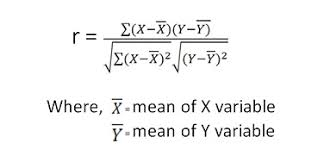

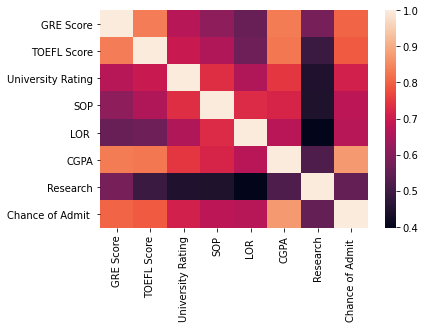

In [32]:
corr = admissions.corr()
# corr() uses pearson method
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Splitting into Test and Train sets
The training set has 75% of data while test set has 25% of it.
random_state acts as the seed for the random number generator during the split.

In [33]:
X = admissions.drop('Chance of Admit ',axis = 1)
y = admissions['Chance of Admit ']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 123)

## Initialising the Model

We used random forest algorithm for solving this regression problem. 
The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data.

n_estimators is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

To tune the hyperparmeter, we used Grid search cross validation
* Manually set a grid of discrete hyperparameter values.
* Set a metric for scoring model performance.
* Search exhaustively through the grid.
* For each set of hyperparameters, evaluate each model's CV score.
* The optimal hyperparameters are those of the model achieving the best CV score

In [34]:
rf_model = RandomForestRegressor(random_state = 21, )
params_rf={
    'n_estimators':[100,200,300]
}
grid_rf=GridSearchCV(estimator=rf_model,
                     param_grid=params_rf,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     verbose=1, n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best hyperparameters: {'n_estimators': 100}
RMSE: 0.22400892839349054


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.2s finished


## Evaluating Model Performance

In [ ]:
best_hyperparams=grid_rf.best_params_
print("Best hyperparameters:", best_hyperparams)
best_model=grid_rf.best_estimator_
y_pred=best_model.predict(X_test)
rmse_test=MSE(y_test, y_pred)**(1/2)
print("RMSE:", rmse_test)


## Plot the class wise feature importance


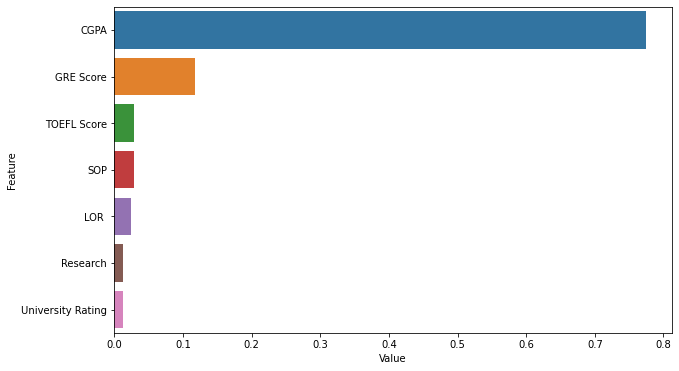

In [36]:
feature_importance = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns)), columns=['Value','Feature']) 
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False)) 